# HW 4 Numerical linear algebra ( 50 pts)


## Please restart the kernel and run all before you submit !


## Your Name: Eric Chi

In [7]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time as time

# Part 1: PCA (25 pts)

In this part, we will use PCA on some real dataset. 

Reuqirements:
1. You should write your own code. You are not allowed to use `sklear.decomposition.PCA` command. (5 pts)

2. Your solution should contain two functions. Function 1 takes data matrix X and integer k as inputs, and returns first k principal components. Function 2 takes data matrix X as input and a threshold $0\leq\eta\leq1$ as inputs, and returns an integer k such that the first $k$ principal components (smallest) has explained variance ratio more than $\eta$. **Your function should work for any data matrix X. In other words, you cannot use any global variable in your function.** (10 pts)

3. Visualize your new datasets in 2D and state your observations. (3 pts)

4. Report the smallest number of principal components reuired to explain 80% variance ratio for both datasets. (2 pts)

5. Function docstrings are required. You should also use inline comments and markdown to explain your code and make conclusions. (5 pts)

Hints:
1. You can assume that each row in $X$ represents a data.
2. Sample codes in lecture notes are helpful.

Datasets (last column is the correct labels):
1. diabetes dataset: url = "https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/03_Numerical_Linear_Algebra/diabetes.csv"
2. swiss roll dataset: url = "https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/03_Numerical_Linear_Algebra/swiss.csv"

Updates:
1. In above datasets, the last column is the correct labels. So when you do PCA, you should not use the last column.
2. When you visualize your 2D data samples, you should use different colors for different classes(labels). The correct labels are included in the last column of each dataset.

In [8]:
ds1 = pd.read_csv("https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/03_Numerical_Linear_Algebra/diabetes.csv")
ds2 = pd.read_csv("https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/03_Numerical_Linear_Algebra/swiss.csv")

diabetes_X = ds1.drop(columns='Outcome')
diabete_y = ds1['Outcome']

diabetes = diabetes_X.to_numpy()
diabetes_standard = (diabetes - diabetes.mean(axis=0)) / diabetes.std(axis=0)

swiss_X = ds2.drop(columns='label')
swiss_y = ds2['label']


swiss = ds2.to_numpy()

def PCA_components(X, k):
    """
    Perform PCA on the data matrix X and return the first k principal components, their eigenvalues and eigenvectors ordered.
    
    Parameters:
        X (ndarray): Data matrix with each row representing a data point.
        k (int): Number of principal components to return.
    
    Returns:
        ndarray: First k principal components.
    """
    # Standardize the data
    X_standard = (X - X.mean(axis=0)) / X.std(axis=0)
    
    # Compute the covariance matrix
    covariance_matrix = np.cov(X_standard.T)
    
    # Compute the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    

    # Sort the eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    


    # Select the first k principal components
    selected_eigenvalues = sorted_eigenvalues[:k]
    selected_eigenvectors = sorted_eigenvectors[:, :k]

    #print ('Eigenvalues: \n', selected_eigenvalues)
    #print ('Eigenvectors: \n', selected_eigenvectors)

    return selected_eigenvectors

def PCA_threshold(X, eta):
    """
    Perform PCA on the data matrix X and return the smallest number of principal components
    such that the explained variance ratio is more than eta.
    
    Parameters:
        X (ndarray): Data matrix with each row representing a data point.
        eta (float): Threshold for explained variance ratio.
    
    Returns:
        int: Smallest number of principal components.
    """
    # Standardize the data
    X_standard = (X - X.mean(axis=0)) / X.std(axis=0)
    
    # Compute the covariance matrix
    covariance_matrix = np.cov(X_standard.T)
    
    # Compute the eigenvalues and eigenvectors
    eigenvalues, _ = np.linalg.eig(covariance_matrix)
    
    # Sort the eigenvalues in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    
    # Compute the explained variance ratio
    explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)
    
    # Find the smallest number of principal components that would satisfy the threshold
    k = 1
    while np.sum(explained_variance_ratio[:k]) < eta:
        k += 1
    
    return k, explained_variance_ratio[:k]


def plot(X, k, y, title):
    """
    Plot the data points in the two principal components.
    
    Parameters:
        X (ndarray): Data matrix with each row representing a data point.
        k (int): Number of principal components to use.
        y (ndarray): Labels of the data points.
        title (str): Title of the plot.

    Returns:
    a plot with the data points in the two principal components.
    """

    X_standard = (X - X.mean(axis=0)) / X.std(axis=0)
    W = PCA_components(X, k)
    X_proj = X_standard @ W
    plt.scatter(X_proj[:, 0], X_proj[:, 1], c = y)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'Data Points in the First Two Principal Components: {title}')
    plt.show()



In [9]:
print('Diabetes PCA components for 2 components:')
print(PCA_components(diabetes, 2))
print('Diabetes data set, components necassary for a 80% explained variance:')
print(PCA_threshold(diabetes, 0.8))

print('Swiss PCA components for 2 components:')
print(PCA_components(swiss, 2))
print('Swiss data set, components necassary for a 80% explained variance:')
print(PCA_threshold(swiss, 0.8))

Diabetes PCA components for 2 components:
[[-0.1284321  -0.59378583]
 [-0.39308257 -0.17402908]
 [-0.36000261 -0.18389207]
 [-0.43982428  0.33196534]
 [-0.43502617  0.25078106]
 [-0.45194134  0.1009598 ]
 [-0.27061144  0.122069  ]
 [-0.19802707 -0.62058853]]
Diabetes data set, components necassary for a 80% explained variance:
(5, array([0.26179749, 0.21640127, 0.12870373, 0.10944113, 0.09529305]))
Swiss PCA components for 2 components:
[[-0.57685266 -0.54568442]
 [ 0.36567099 -0.80232614]
 [ 0.10718841  0.23319367]
 [ 0.72252085 -0.06420268]]
Swiss data set, components necassary for a 80% explained variance:
(3, array([0.35899542, 0.26473177, 0.24781893]))


In my code I have made 3 different functions, the last one utilizing function 1 in terms of plotting. Function 1 "PCA_components" Performs PCA on the data matrix X, assuming it has already been made into a data matrix, and returns the first k prinicipal components. This is done using the standard order of operations when computing PCA which first standardizes the data, computes a covariance matrix, then computes and sorts the eigenvalues and eigenvectors of the covariance matrix.

Function 2 is the one which finds the smallest k threshold for a given explained variance ratio. The function is very similar to the first one, however it compites the explained_variance ratio and compares each k starting from 1 and checks if it is above the threshold.

The plotting function takes the eigenvalues from our first function and uses it to create a projection. It then plots the projection on a scatterplot.


We see that to achieve an 80% explained variance ratio, for the diabetes set we need at least 5 components.
For the swiss set we need at least 3 data sets.



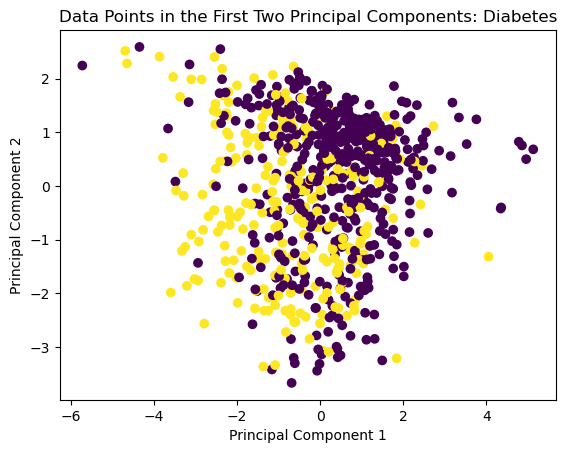

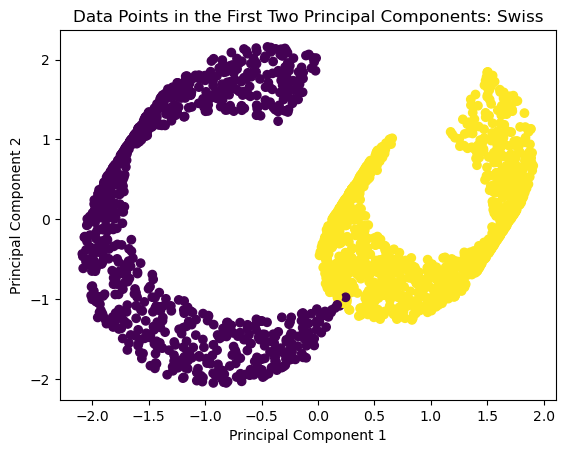

In [10]:
plot(diabetes, 2, diabete_y,'Diabetes')

plot(swiss, 2, swiss_y, 'Swiss')

# **Concluions**
From the datasets we see that we need at least 5 variables to reach an 80% explained variance. This means that at least 5 variables are needed to explain at least 80% of the data. From the scatterplot we see that there is a chunk of the points lie within 1 of PC1 and 0-1 of PC2. This means that most of the points lie slightly above the mean of PCA1 and just right around the mean of PCA2. Because the colors are pretty tightly intertwined this means that with the two Principle components we did not adequetely find patterns in the dataset. This makes sense however as the diabetes dataset has a great variety of variables which probably have impacts on the target or label.


When we look at the swiss dataset we see a drastic change from the diabetes dataset. We need at least 3 variables to reach a 80% explained variance, this makes sense to us as the original dataset only had but 3 columns. When we look at the graph of the swiss dataset we see points that are spread in a specific direction and this means that our PCA did a good job in distinguishing the variables and what they might mean in comparison to the target. 

# Part 2: Least square (25 pts)

Consider the following least-square problem

$$ \mathop{ \mathrm{min} }_x \|Ax-b\|_2^2, $$

the solution can be written as a nice formula $x=(A^TA)^{-1}A^Tb$, which comes from normal equation $A^TAx = A^Tb$.


In this part, we want to compare the computational times of using matrix inverse and solve command.

Step 1: Write a function to generate matrix $A$ with m rows and N columns, and observation vector $b$ with m rows 1 column. Both matrix $A$ and vector $b$ are randomly generated by using `np.random`. The distribution of $A$ or $b$ can be either standard gaussian (`np.random.randn`) or uniform (`np.random.rand`). In other words, your function should allow four different choices, which are 1. gaussian $A$ and gaussian $b$, 2. gaussian $A$ and uniform $b$, 3. uniform $A$ and gaussian $b$, and 4. uniform $A$ and uniform $b$. (5 pts)

Step 2: Use function written in step 1 to generate $A$ and $b$ with fixed number of rows $m=10000$ and varied number of columns $N=[1000,2000,4000,8000,16000]$ (You can determine the distribution you want to use). Then, use matrix inverse and solve command to solve least square problem with $A$ and $b$. (5 pts)

Step 3: Visualization and conclusion. The first plot is computation time (y-axis) vs N (x-axis) for inverse matrix method and solve command method. The second plot is plotting log(time) (y-axis) vs log(N) (x-axis). You should add legends, titles, xlabels, ylabels and etc to make your plot clear. What is your conclusion? (10 pts, 5 pts each figure)


**Requirement:**

You should write docstring for your function and inline comments for your codes. (5 pts)

In [11]:
# Your solution here.
def generate_data(m, N, distribution_A, distribution_b):
    """
    Generate matrix A with m rows and N columns and observation vector b with m rows 1 column.
    
    Parameters:
        m (int): Number of rows in matrix A and observation vector b.
        N (int): Number of columns in matrix A.
        distribution_A (str): Distribution of matrix A. The two options are: 'gaussian', 'uniform'.
        distribution_b (str): Distribution of observation vector b. Again the two options are: 'gaussian', 'uniform'.
    
    Returns:
        ndarray: Matrix A.
        ndarray: Observation vector b.
    """
    if distribution_A == 'gaussian':
        A = np.random.randn(m, N)
    elif distribution_A == 'uniform':
        A = np.random.rand(m, N)
    
    if distribution_b == 'gaussian':
        b = np.random.randn(m, 1)
    elif distribution_b == 'uniform':
        b = np.random.rand(m, 1)
    
    return A, b

#creating the data

m = 10000
N = [1000, 2000, 4000, 8000, 16000]

distribution_A = 'gaussian'
distribution_b = 'gaussian'

A_list = []
b_list = []

for n in N:
    A, b = generate_data(m, n, distribution_A, distribution_b)
    A_list.append(A)
    b_list.append(b)


def solve(A, b):
    """
    Solve the least squares problem using the equation.

    Parameters:
        A (ndarray): Matrix A.
        b (ndarray): Observation vector b.

    Returns:
        ndarray: Solution x.
    """
    time_start = time.time()
    x = np.linalg.solve(A.T @ A, A.T @ b)
    time_end = time.time()
    time_elapsed = time_end - time_start
    return x, time_elapsed

#collecting the time elapsed for the leastsquares problem for each N
times = []
for i in range(len(A_list)):
    x, time_elapsed = solve(A_list[i], b_list[i])
    times.append(time_elapsed)
    print(f'N = {N[i]}: {time_elapsed:.4f} seconds')



N = 1000: 0.1372 seconds
N = 2000: 0.5632 seconds
N = 4000: 1.9399 seconds
N = 8000: 8.0495 seconds
N = 16000: 62.4770 seconds


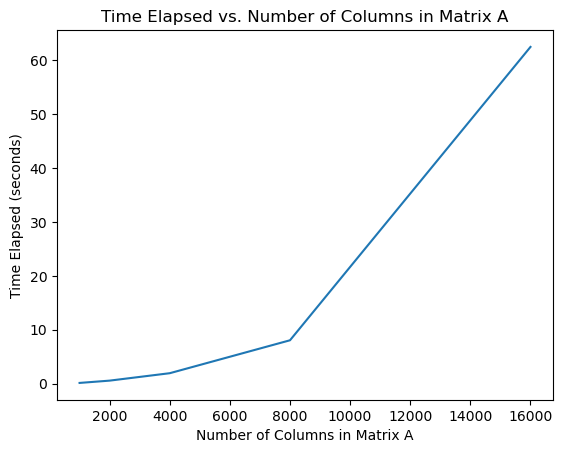

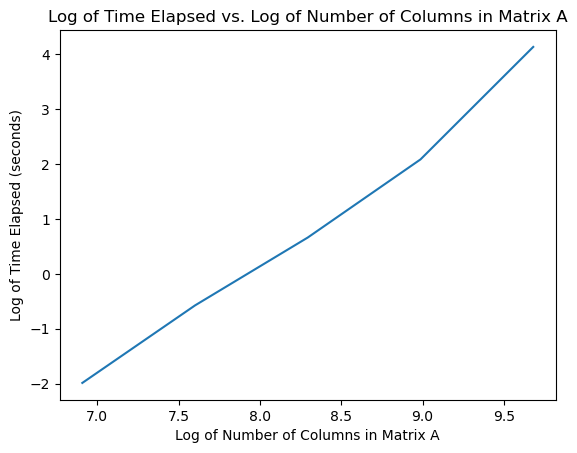

In [12]:
#plotting the time elapsed vs. the number of columns in matrix A
plt.plot(N, times)
plt.xlabel('Number of Columns in Matrix A')
plt.ylabel('Time Elapsed (seconds)')
plt.title('Time Elapsed vs. Number of Columns in Matrix A')
plt.show()


#plotting the log of time eplapsed vs. the log of the number of columns in matrix A
plt.plot(np.log(N), np.log(times))
plt.xlabel('Log of Number of Columns in Matrix A')
plt.ylabel('Log of Time Elapsed (seconds)')
plt.title('Log of Time Elapsed vs. Log of Number of Columns in Matrix A')
plt.show()



# **Conclusion**
We can see from the time elapsed vs. Number of columns in matrix A that as the number of columns increases the time elapsed increases, but increases at a higher rate the greater the number of columns.

From the log of Time Elapsed vs Log of Number of Columns in Matrix A there is a linear progression. This immediately proves my speculation from the first graph as a linear progresion in Log means that as the X increases, the increase in y also increases.